In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
#Load the testing and training data
df_test = pd.read_csv('data/Testing.csv')
df_train = pd.read_csv('data/Training.csv')

In [3]:
#Load the label encoder
le = preprocessing.LabelEncoder()

In [4]:
#Determine features and target of training and testing data
X_train = df_train.iloc[:,0:131]
x_test = df_test.iloc[:,0:131]
y_train_labelled = df_train.iloc[:,132]
Y_test_labelled = df_test.iloc[:,132]

In [5]:
#Encode labels
y_train = le.fit_transform(y_train_labelled)
Y_test = le.fit_transform(Y_test_labelled)

In [6]:
#Decision Tree Classifier
model_DT = DecisionTreeClassifier(class_weight='balanced')
model_DT.fit(X_train,y_train)
print("Accuracy Score of Decision tree Classifier : "+str(accuracy_score(Y_test, model_DT.predict(x_test))*100)+"%")

Accuracy Score of Decision tree Classifier : 97.61904761904762%


In [7]:
#Naive Bayes Classifier
model_NB = GaussianNB()
model_NB.fit(X_train,y_train)
print("Accuracy Score of Naive Bayes Classifier : "+str(accuracy_score(Y_test, model_NB.predict(x_test))*100)+"%")

Accuracy Score of Naive Bayes Classifier : 100.0%


In [8]:
#Support Vector Classifier
model_SVC = SVC(kernel='linear', C=1)
model_SVC.fit(X_train,y_train)
print("Accuracy Score of Support Vector Classifier : "+str(accuracy_score(Y_test, model_SVC.predict(x_test))*100)+"%")

Accuracy Score of Support Vector Classifier : 100.0%


In [9]:
#Softmax Classifier
model_SM = LogisticRegression(random_state=0, multi_class='multinomial', max_iter=1000)
model_SM.fit(X_train,y_train)
print("Accuracy Score of Softmax Classifier : "+str(accuracy_score(Y_test, model_SM.predict(x_test))*100)+"%")

Accuracy Score of Softmax Classifier : 97.61904761904762%


In [10]:
#PCA
accuracy_DT = []
accuracy_SVC = []
accuracy_NB = []
accuracy_SM = []
features = []
for i in range(41):
    pca = PCA(n_components=(i+1))
    X_train_pca = pca.fit_transform(X_train)
    x_test_pca = pca.fit_transform(x_test)
    model_DT.fit(X_train_pca, y_train)
    model_NB.fit(X_train_pca, y_train)
    model_SVC.fit(X_train_pca, y_train)
    model_SM.fit(X_train_pca, y_train)
    accuracy_DT.append(accuracy_score(Y_test, model_DT.predict(x_test_pca))*100)
    accuracy_NB.append(accuracy_score(Y_test, model_NB.predict(x_test_pca))*100)
    accuracy_SVC.append(accuracy_score(Y_test, model_SVC.predict(x_test_pca))*100)
    accuracy_SM.append(accuracy_score(Y_test, model_SM.predict(x_test_pca))*100)
    features.append(i+1)

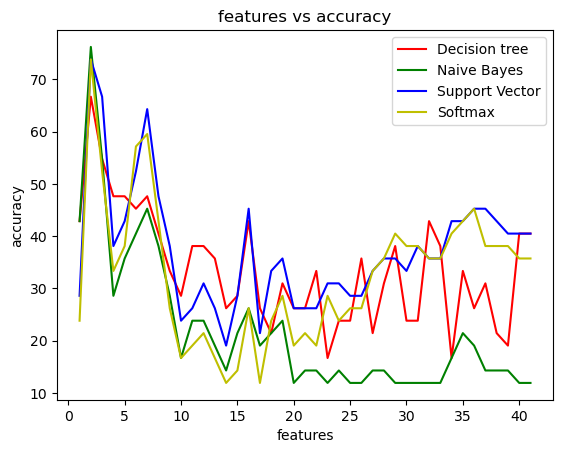

In [11]:
#Plotting
plt.plot(features, accuracy_DT, color='r', label='Decision tree')
plt.plot(features, accuracy_NB, color='g', label='Naive Bayes')
plt.plot(features, accuracy_SVC, color='b', label='Support Vector')
plt.plot(features, accuracy_SM, color='y', label='Softmax')

plt.xlabel("features")
plt.ylabel("accuracy")
plt.title("features vs accuracy")

plt.legend()

plt.show()

In [12]:
#Random Forest
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)
print("Accuracy Score of Random Forest Classifier : "+str(accuracy_score(Y_test, rf.predict(x_test))*100)+"%")

Accuracy Score of Random Forest Classifier : 97.61904761904762%


In [13]:
#Tuning hyperparameters of random forest classifier

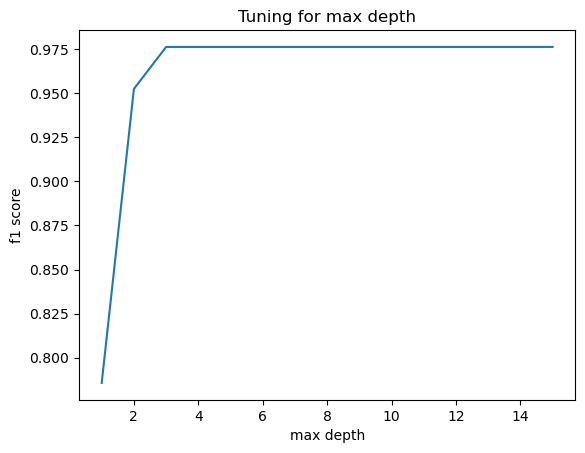

In [14]:
#max_depth
performance_max_depth = []
max_depth = []
for i in range(15):
    rf_md = RandomForestClassifier(random_state=0, max_depth=(i+1))
    rf_md.fit(X_train,y_train)
    performance_max_depth.append(f1_score(Y_test, rf_md.predict(x_test), average='micro'))
    max_depth.append((i+1))

plt.plot(max_depth, performance_max_depth)
plt.xlabel("max depth")
plt.ylabel("f1 score")
plt.title("Tuning for max depth")
plt.show()

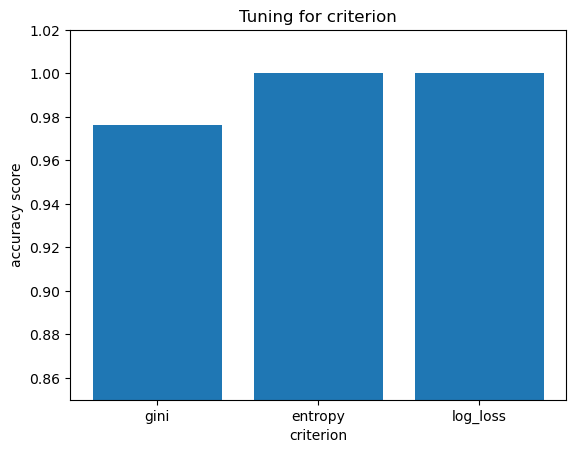

In [15]:
#criterion
performance_criterion = []
criterion = ['gini', 'entropy', 'log_loss']

for i in range(3):
    rf_c = RandomForestClassifier(random_state=0, criterion = criterion[i])
    rf_c.fit(X_train,y_train)
    performance_criterion.append(accuracy_score(Y_test, rf_c.predict(x_test)))

plt.bar(criterion, performance_criterion)
plt.xlabel("criterion")
plt.ylabel("accuracy score")
plt.ylim(0.85,1.02)
plt.title("Tuning for criterion")
plt.show()

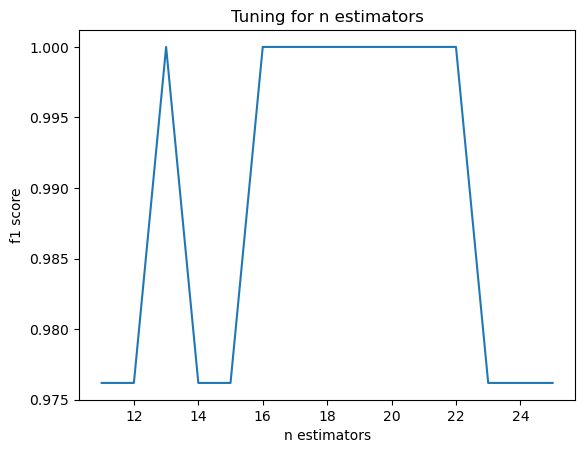

In [16]:
#n_estimators
performance_n_estimators = []
n_estimators = []
for i in range(15):
    rf_ne = RandomForestClassifier(random_state=0, n_estimators=10+(i+1))
    rf_ne.fit(X_train,y_train)
    performance_n_estimators.append(f1_score(Y_test, rf_ne.predict(x_test), average='micro'))
    n_estimators.append(10+(i+1))

plt.plot(n_estimators, performance_n_estimators)
plt.xlabel("n estimators")
plt.ylabel("f1 score")
plt.title("Tuning for n estimators")
plt.show()

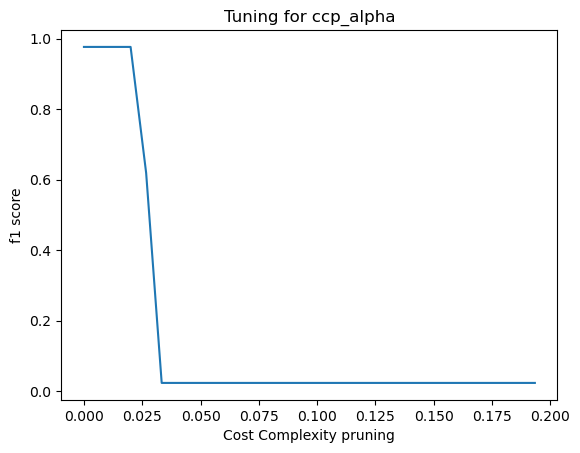

In [17]:
#ccp_alpha
performance_ccp_alpha = []
ccp_alpha = []
for i in range(30):
    rf_ccp = RandomForestClassifier(random_state=0, ccp_alpha=(i)/150)
    rf_ccp.fit(X_train,y_train)
    performance_ccp_alpha.append(f1_score(Y_test, rf_ccp.predict(x_test), average='micro'))
    ccp_alpha.append((i)/150)

plt.plot(ccp_alpha, performance_ccp_alpha)
plt.xlabel("Cost Complexity pruning")
plt.ylabel("f1 score")
plt.title("Tuning for ccp_alpha")
plt.show()

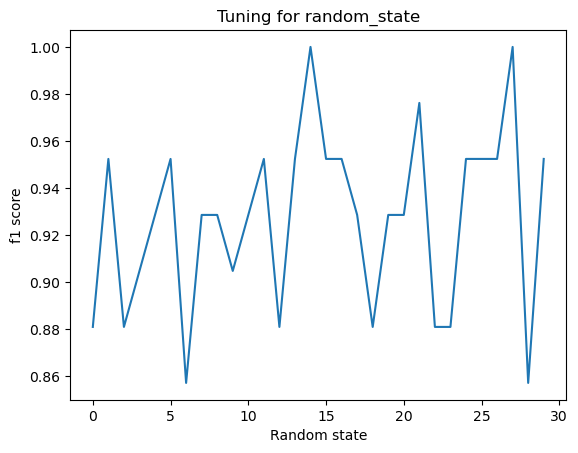

In [30]:
#random_state
performance_random_state = []
random_state = []
for i in range(30):
    #vary random state with optimal values of other parameters to get deterministic high accuracy
    rf_rs = RandomForestClassifier(random_state=i, max_depth=3, criterion='entropy', n_estimators=19, ccp_alpha=0.0)
    rf_rs.fit(X_train,y_train)
    performance_random_state.append(f1_score(Y_test, rf_rs.predict(x_test), average='micro'))
    random_state.append(i)

plt.plot(random_state, performance_random_state)
plt.xlabel("Random state")
plt.ylabel("f1 score")
plt.title("Tuning for random_state")
plt.show()

In [34]:
#Tuned Random forest classifier
rf_tuned = RandomForestClassifier(random_state=14, max_depth=3, criterion='entropy', n_estimators=19, ccp_alpha=0.0)
rf_tuned.fit(X_train,y_train)
print("Accuracy score: "+str(accuracy_score(Y_test, rf_tuned.predict(x_test))*100))

Accuracy score: 100.0
